In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

In [ ]:
vendas = pd.read_excel('varejo.xlsx')

In [ ]:
vendas['estado'].fillna('MS', inplace=True)
vendas['Preço'].fillna(vendas['Preço'].mean(), inplace=True)

In [ ]:
vendas['idcanalvenda'] = vendas['idcanalvenda'].str.replace('APP', 'Aplicativo')

In [ ]:
vendas = vendas.query('Preço < Preço_com_frete')

In [ ]:
vendas.head()

,idcompra,idcanalvenda,bandeira,Data,Preço,Preço_com_frete,Nome_Departamento,estado,cliente_Log
0,393835,Mobile,A,2023-03-05,1582.560,791.280,Telefones e Celulares,SP,15042
1,411885,Mobile,A,2023-03-17,679.200,679.200,Tablets,SP,17590
2,437305,Mobile,A,2023-03-06,35.920,37.512,Bebes,SP,15478
3,440055,APP,A,2023-01-13,2239.416,2239.416,TVs e Acessorios,SP,2933
4,455795,Mobile,B,2023-03-31,1743.200,1785.112,Esporte e Lazer,RS,19790


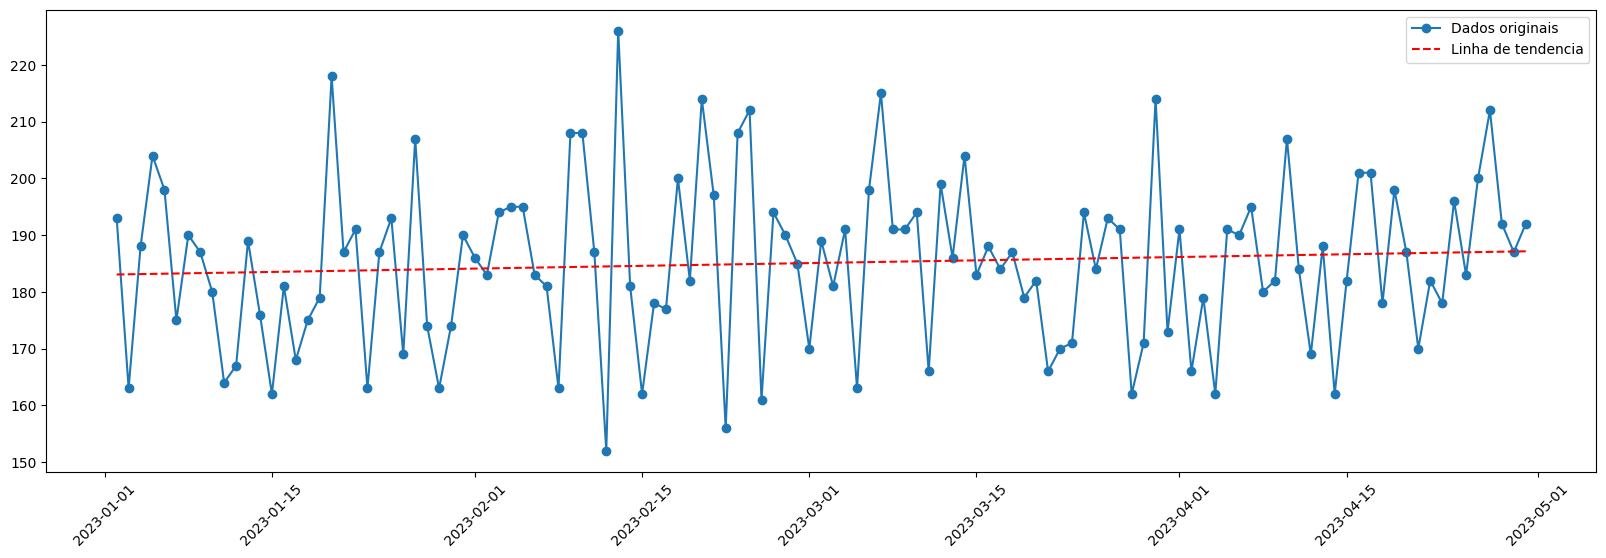

In [ ]:
vendas_tempo = vendas.groupby('Data').idcompra.nunique().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(vendas_tempo['Data'], vendas_tempo['idcompra'], marker='o', label='Dados originais')
plt.xticks(rotation=45)

x = date2num(vendas_tempo['Data'])
coef = np.polyfit(x, vendas_tempo['idcompra'], 1)
trendline = np.polyval(coef, x)

plt.plot(vendas_tempo['Data'], trendline, linestyle='--', color='red', label='Linha de tendencia')

plt.legend()

In [ ]:
clientes = pd.read_excel('cliente_varejo.xlsx')

In [ ]:
clientes['Faixa Etária'] = pd.cut(clientes['idade'], bins=range(0, 101, 10), labels=[f'{i} -- {i + 9}' for i in range(1, 100, 10)])
métricas = ['mean', 'median', 'min', 'max', 'count']

metricas_faixa_etaria = clientes.groupby('Faixa Etária').renda.agg(métricas).reset_index()

<ipython-input-42-c201ce277f50>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  metricas_faixa_etaria = clientes.groupby('Faixa Etária').renda.agg(métricas).reset_index()


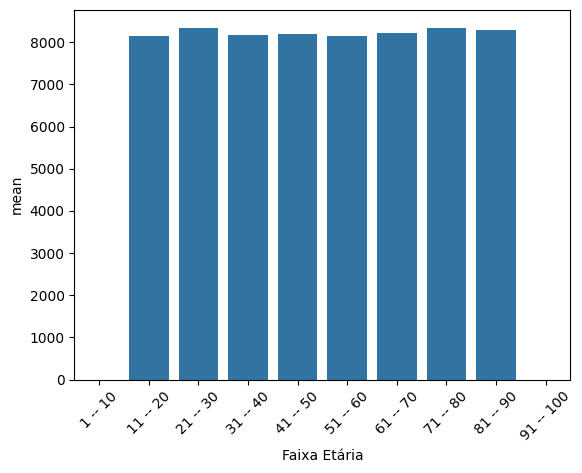

In [ ]:
sns.barplot(metricas_faixa_etaria, x='Faixa Etária', y='mean')
plt.xticks(rotation=45);

In [ ]:
vendas['Mês'] = vendas['Data'].dt.month
media_pf_mes = vendas.groupby('Mês').Preço_com_frete.mean().reset_index()

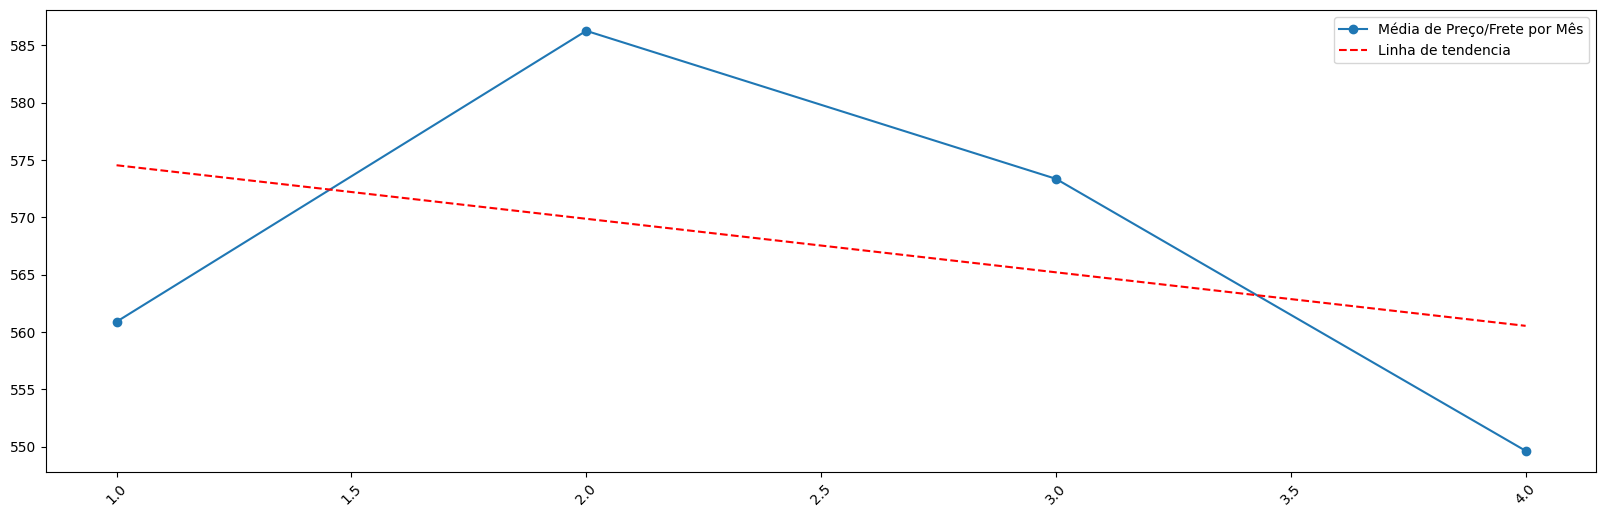

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(media_pf_mes['Mês'], media_pf_mes['Preço_com_frete'], marker='o', label='Média de Preço/Frete por Mês')
plt.xticks(rotation=45)

coef = np.polyfit(media_pf_mes['Mês'], media_pf_mes['Preço_com_frete'], 1)
trendline = np.polyval(coef, media_pf_mes['Mês'])

plt.plot(media_pf_mes['Mês'], trendline, color='red', linestyle='--', label='Linha de tendencia')

plt.legend()

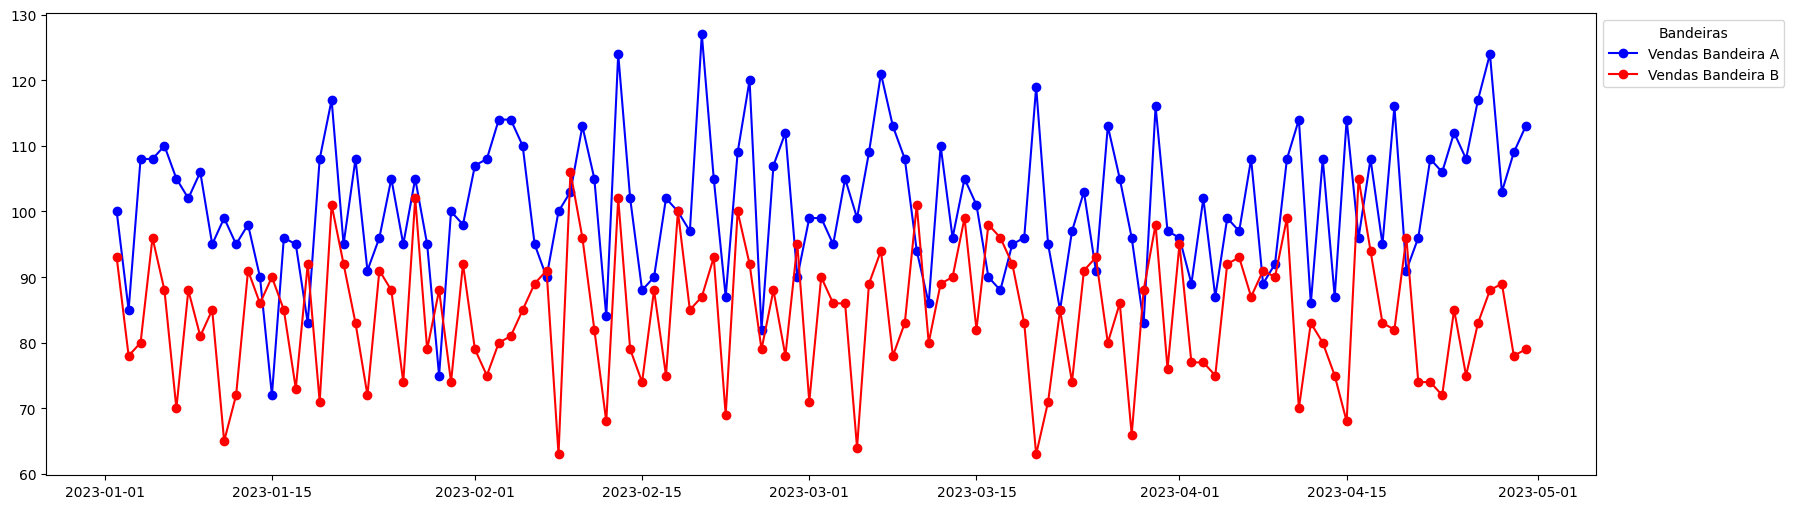

In [ ]:
vendas_bandeira_a = vendas.query('bandeira == "A"').groupby('Data').idcompra.nunique().reset_index()
vendas_bandeira_b = vendas.query('bandeira == "B"').groupby('Data').idcompra.nunique().reset_index()

plt.figure(figsize=(20, 6))
plt.plot(vendas_bandeira_a['Data'], vendas_bandeira_a['idcompra'], color='blue', marker='o', label='Vendas Bandeira A')
plt.plot(vendas_bandeira_b['Data'], vendas_bandeira_b['idcompra'], color='red', marker='o', label='Vendas Bandeira B')

plt.legend(title='Bandeiras', bbox_to_anchor=(1, 1))